# Importando e tratando os dados

In [21]:
import pandas as pd
import seaborn as sns

In [6]:
gorjetas_df = pd.read_csv('tips.csv')

In [4]:
gorjetas_df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [7]:
gorjetas_df = gorjetas_df.rename(columns = renomear)

In [8]:
gorjetas_df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
gorjetas_df.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [12]:
gorjetas_df.sobremesa = gorjetas_df.sobremesa.map(sim_nao)

In [13]:
gorjetas_df.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [15]:
gorjetas_df.dia_da_semana = gorjetas_df.dia_da_semana.map(dias)

In [17]:
gorjetas_df.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [19]:
gorjetas_df.hora_do_dia = gorjetas_df.hora_do_dia.map(hora)

In [20]:
gorjetas_df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [22]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\robotframework_python3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [23]:
gorjetas_df.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

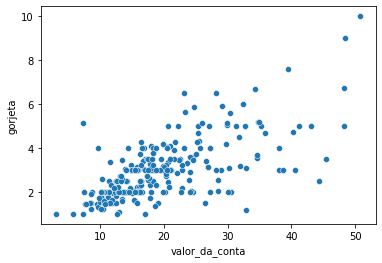

In [25]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y='gorjeta', data = gorjetas_df)

#### Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [32]:
print('A base de dados contem {} registros\n'.format(gorjetas_df.shape[0]))
print('Registros não nulos:')
gorjetas_df.count()

A base de dados contem 244 registros

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo procentagem

In [33]:
gorjetas_df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [36]:
gorjetas_df['porcentagem'] = round(gorjetas_df['gorjeta'] / gorjetas_df['valor_da_conta'],2)

In [37]:
gorjetas_df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


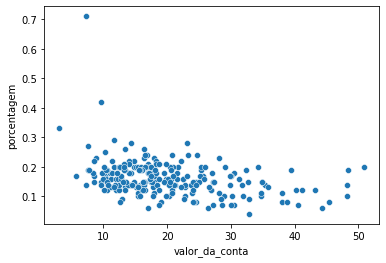

In [39]:
procentagem_conta = sns.scatterplot( x = 'valor_da_conta', y ='porcentagem', data = gorjetas_df)

#### Entretando podemos ver que o valor da conta não é proporcional ao valor da gorjeta

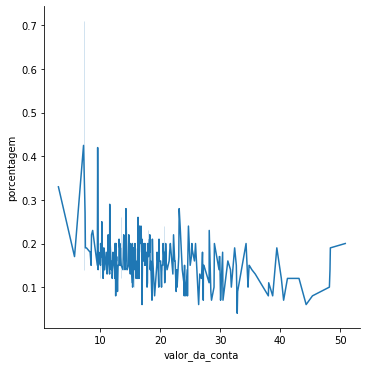

In [41]:
procentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas_df)

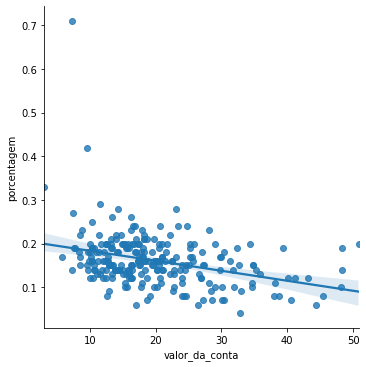

In [44]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas_df)

##

# Análise 2 - sobremesa

In [45]:
gorjetas_df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [49]:
gorjetas_df[gorjetas_df.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [50]:
gorjetas_df[gorjetas_df.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


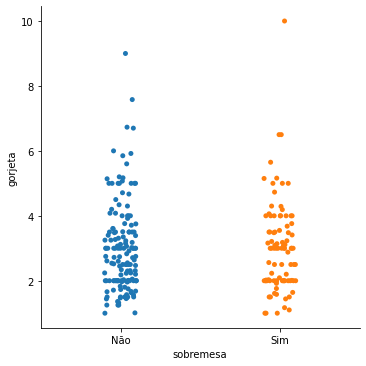

In [51]:
sns.catplot(x='sobremesa', y = 'gorjeta', data = gorjetas_df)

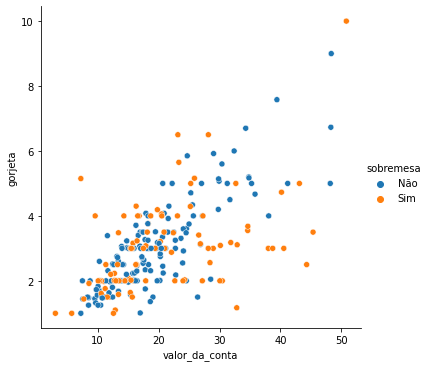

In [52]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas_df)

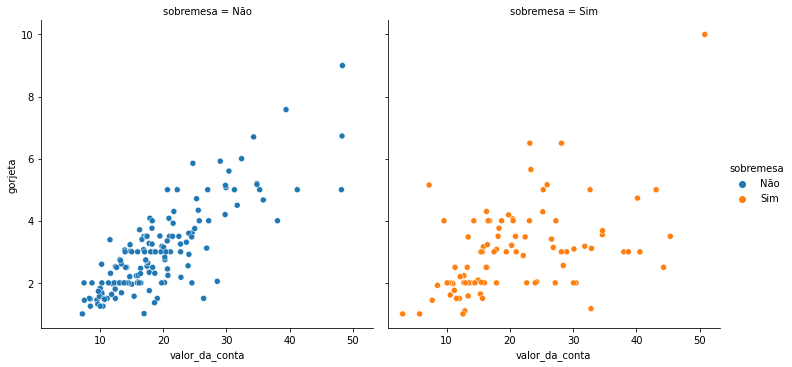

In [53]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col = 'sobremesa', data=gorjetas_df)

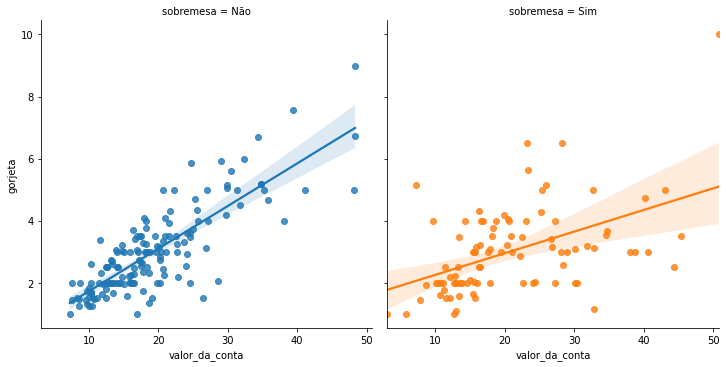

In [54]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas_df)

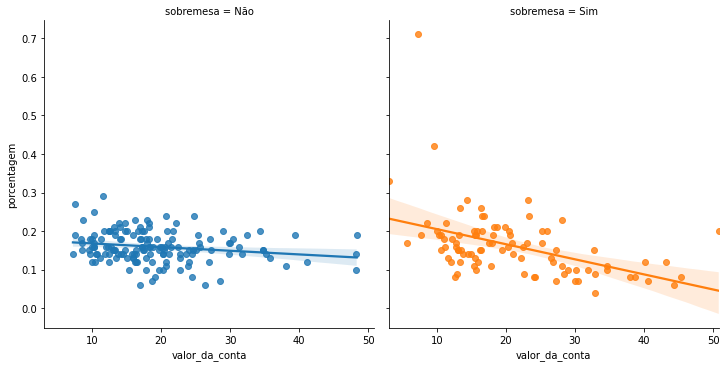

In [56]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas_df)

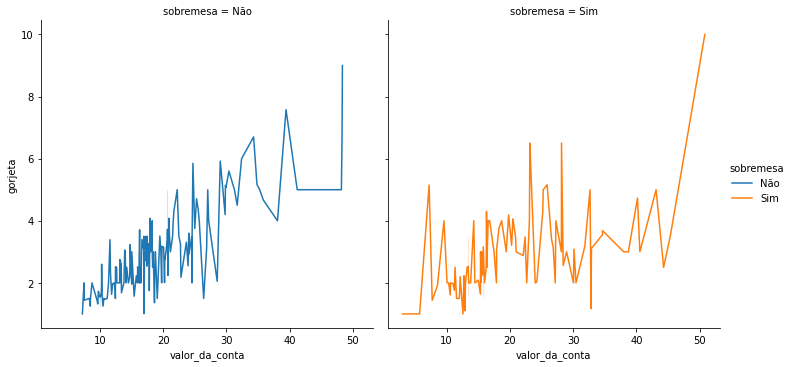

In [58]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col = 'sobremesa', kind = 'line', data=gorjetas_df)

#### Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e que não pediram